In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160222_NO_fixI0"

input = "../DOAS/#{prefix}.csv"

input_sum = "../DOAS/#{prefix}_sum.csv"

img_cal = "../images/#{prefix}.png"

flow_air = 3.0
flow_no_offset = 0.004
c_no = 8.177e3

nil

# Data Preparation

In [3]:
d = DataFrame.from_csv(input)
d.vectors = Index.new(d.vectors.to_a.map{|i| i.to_sym})
d.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.0561482079292129,0.144215319895637,-4727180.70546589,1431217.85009207,0,0.410158797042244,0.100761243307172,2210.24552509457,1782.58710535014,2016-02-22T16:58:25+01:00
1,-0.00991036678870526,0.137068792541294,-4772875.51546209,1378322.03054337,1,0.103683751953498,0.0969711488643265,2564.16636995828,1715.57962763711,2016-02-22T16:58:57+01:00
2,-0.0227408015772355,0.133007309084865,-5447623.43708315,1350281.38249307,2,0.00881702253383912,0.0949870881905251,1973.76359793092,1679.95342442762,2016-02-22T16:59:28+01:00
3,-0.00521595039894354,0.132424824902637,-5377047.1956382,1355096.31775139,3,0.00802303162937061,0.0953145590939778,1860.93987952086,1685.28431596482,2016-02-22T16:59:59+01:00
4,0.0971034528740278,0.14004357831329,-5394010.39989591,1436693.09427266,4,-0.0147018826328475,0.101051445013856,2043.2717276465,1786.55463782791,2016-02-22T17:00:30+01:00
5,-0.0389315364817067,0.138404461743999,-5467692.16369806,1424902.88940073,5,0.00434778449761546,0.100216633841633,2088.73130170951,1771.60487464362,2016-02-22T17:01:01+01:00
6,-0.0036489441793201,0.135484211754093,-4547515.63078919,1395669.63846123,6,-0.00317415206741898,0.098158937938977,1977.59999386987,1735.21267037815,2016-02-22T17:01:32+01:00
7,-0.0260925822600377,0.138749993276629,-4949614.38075274,1399652.26564164,7,0.0194207258524234,0.0984690348695914,1972.53452053032,1741.89316263743,2016-02-22T17:02:03+01:00
8,-0.0208796939111295,0.125704212030663,-5022579.41474963,1277332.88394213,8,0.0342178906781228,0.0898542876381022,2292.40005371747,1589.10899308382,2016-02-22T17:02:34+01:00
9,-0.100882526161122,0.133657147452362,-4868249.19923367,1376653.48684489,9,0.0766549478923037,0.096822478510221,1930.16480878357,1711.56943463859,2016-02-22T17:03:05+01:00


# Plot

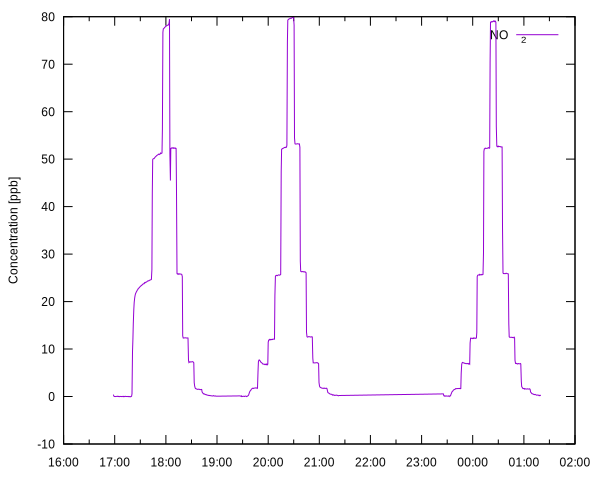

In [4]:
d.index = DateTimeIndex.new(d[:timestamp])

Plot.new(
  [d[:no2], with: "lines", title: "NO_2"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

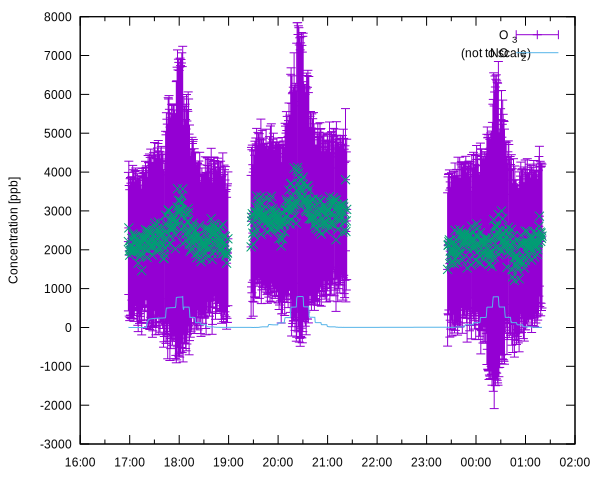

In [5]:
d.index = DateTimeIndex.new(d[:timestamp])

Plot.new(
  [d[:o3, :o3_err], with: "yerrorbars", title:"O_3"],
  [d[:o3], title: ""],
  [d[:no2]*10, with: "lines", title: "NO_2 (not to scale)"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

# Compute Averages

In [6]:
summary = DataFrame.from_csv(input_sum)
summary.vectors = Index.new(summary.vectors.to_a.map{|i| i.to_sym})
summary.head

,flow,length,start,stop
0,0.1,5,70,80
1,0.2,5,94,110
2,0.3,5,115,125
3,0.2,5,131,141
4,0.1,5,145,155
5,0.05,5,158,168
6,0.03,5,171,181
7,0.01,5,189,199
8,0.01,10,262,272
9,0.03,10,285,295


In [7]:
summary[:no_comp] = summary.collect_rows do |row|
  c_no*(row[:flow] - flow_no_offset)*0.1/((row[:flow]-flow_no_offset)*0.1 + flow_air)
end
summary

,flow,length,start,stop,no_comp
0,0.1,5,70,80,26.0829346092504
1,0.2,5,94,110,53.076301496887005
2,0.3,5,115,125,79.89147082123053
3,0.2,5,131,141,53.076301496887005
4,0.1,5,145,155,26.0829346092504
5,0.05,5,158,168,12.518871064367971
6,0.03,5,171,181,7.0805968160927195
7,0.01,5,189,199,1.6350729854029196
8,0.01,10,262,272,1.6350729854029196
9,0.03,10,285,295,7.0805968160927195


In [8]:
d.index = Index.new(d[:index].to_a)

summary[:no] = Array.new(summary.nrows)
summary[:no_err] = Array.new(summary.nrows)

summary.recode_rows do |row|
  
  pointer = d[:index].map do |i|
    ret = false
    
    if i >= row[:start] and i <= row[:stop]
      ret = true
    end
    ret
  end
  
  subset = d.where(pointer)
  
  if subset.nrows == 0
    row[:no] = nil
    row[:no_err] = nil
  else
    row[:no] = subset[:no2].mean
    row[:no_err] = subset[:no2].std/Math::sqrt(subset.nrows.to_f)
  end
  
  row
end

,flow,length,start,stop,no_comp,no,no_err
0,0.1,5,70,80,26.0829346092504,24.157286981693098,0.05184098828626122
1,0.2,5,94,110,53.076301496887005,50.91643414327481,0.06894469754558918
2,0.3,5,115,125,79.89147082123053,78.01928730838856,0.06907264446192832
3,0.2,5,131,141,53.076301496887005,52.32661351703259,0.01403909421524075
4,0.1,5,145,155,26.0829346092504,25.791701301334864,0.016161105425207566
5,0.05,5,158,168,12.518871064367971,12.339841260010855,0.006564897309863522
6,0.03,5,171,181,7.0805968160927195,7.285211677892634,0.013651472423478897
7,0.01,5,189,199,1.6350729854029196,1.5046399087469586,0.010664134549276833
8,0.01,10,262,272,1.6350729854029196,1.774723936372453,0.011743507950186003
9,0.03,10,285,295,7.0805968160927195,6.78073531713637,0.01798748051494972


In [9]:
plot = Plot.new(
  [summary[:no_comp, :no, :no_err], using: "2:3:4", with: "yerrorbars", title: ""],
  xlabel: "Concentration, computed [ppb]",
  ylabel: "Concentration, DOAS [ppb]"
  )
nil

In [10]:
fit = fit_poly(summary[:no_comp, :no, :no_err], degree: 1, using: "2:3:4")
fit[:formula_ds].data

" -0.00234419*x**0 + 0.993688*x**1 "

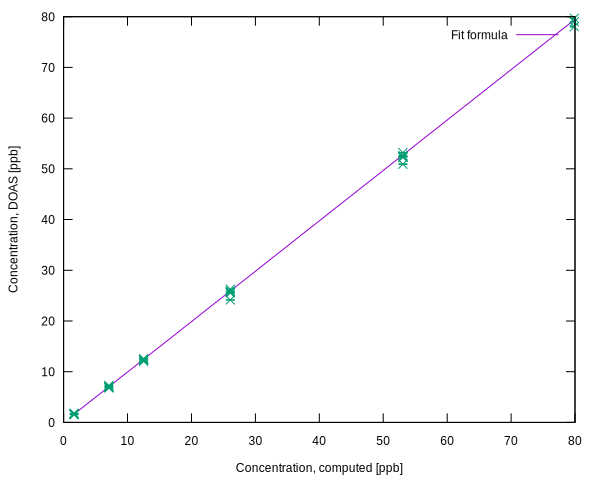

In [11]:
(plot << fit[:formula_ds]).to_png(img_cal)

# Length dependence

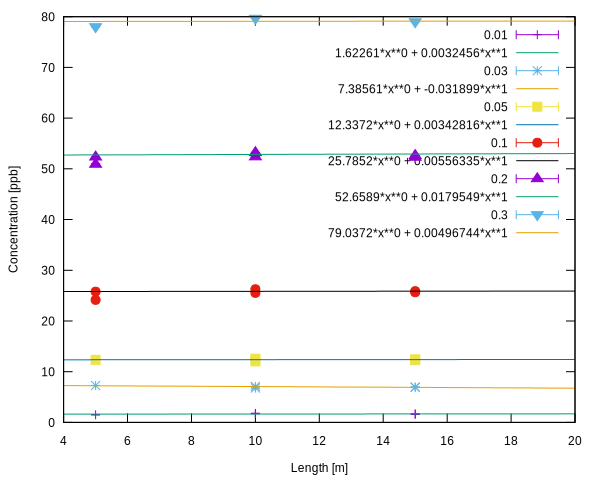

In [12]:
tmp = []

[0.01, 0.03, 0.05, 0.1, 0.2, 0.3].each do |flow|
  tmp << [ summary.where(summary[:flow].eq(flow))[:length, :no, :no_err], using: "2:3:4", 
    with: "yerrorbars", title: "#{flow}"]
  fit = fit_poly(summary.where(summary[:flow].eq(flow))[:length, :no, :no_err], using: "2:3:4", degree: 1)
  fit[:formula_ds].title = fit[:formula_ds].data
  tmp << fit[:formula_ds]
end

#summary.where(summary[:flow].eq(0.1))
plot = Plot.new(*tmp,
  xlabel: "Length [m]",
  ylabel: "Concentration [ppb]",
  xrange: 4..20)